In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler

from keras import models
from keras import layers

Using TensorFlow backend.


In [22]:
raw = pd.read_csv('clean_data.csv')

In [23]:
df = raw[:]
df.drop(columns=['Unnamed: 0'], inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
df.sample(10)

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
853,0.546393,0.113922,2878.135685,4684.241163,6360.937500,0.030758,-205.487869,133.812012,6.378830,19.708214,...,4.021676,5.670356,2.437882,-0.870088,5.049088,5.088596,9.346718,1.042095,4.162721,noisy
1522,0.577984,0.077711,3743.097252,5561.935480,8613.281250,0.032311,-308.606598,114.521500,29.174204,12.554191,...,5.203612,2.088779,7.103682,6.710810,6.570192,3.896131,6.389806,0.214119,2.302424,noisy
862,0.511070,0.069959,2538.287656,4597.345243,5223.370296,0.020279,-306.823486,147.832993,18.117331,14.568597,...,0.991739,0.292683,5.769640,5.897959,7.677010,1.371261,3.594155,0.985624,-1.491890,noisy
1600,0.459821,0.085970,3135.677417,4532.642374,7008.535880,0.046244,-205.499222,136.754730,8.295756,24.001339,...,3.070464,5.875611,1.459172,-0.761881,3.604788,2.685039,5.346411,-0.178069,-0.769629,noisy
1544,0.620830,0.024522,3762.284002,5356.001157,8754.310345,0.044400,-401.022644,115.999023,11.687867,15.249053,...,3.434721,7.796094,1.367696,1.628057,9.684388,2.170479,2.891431,-1.174108,1.696491,noisy
830,0.528046,0.039786,3513.822496,4746.133763,6928.875000,0.051828,-368.913086,117.023201,8.858659,20.760509,...,1.760267,2.580727,3.622672,1.226964,4.441804,5.313216,6.345790,-2.424308,-1.121348,noisy
123,0.572079,0.034403,3346.635415,4996.060553,7258.741259,0.046479,-429.402039,94.320999,4.646223,20.405909,...,11.177666,4.068501,5.535565,7.417824,11.191915,10.257754,4.565359,2.512191,1.062449,clean
939,0.536600,0.061819,2713.910538,4597.772747,5659.858820,0.026865,-284.239288,141.663422,10.754776,19.829496,...,3.247264,0.525137,3.255810,2.526368,6.084528,3.552429,4.172998,-1.093737,2.934429,noisy
44,0.502823,0.066981,2889.198593,4606.048436,6342.187500,0.026610,-392.654205,119.264938,14.454150,17.078720,...,10.427136,-4.683949,0.752584,6.519804,7.394217,6.985643,5.470838,4.667185,0.233097,clean
1073,0.655263,0.057283,4133.213239,5937.180625,10528.364702,0.035043,-361.717987,104.002777,33.944820,16.736712,...,6.883377,1.121363,8.908209,4.724882,5.803524,2.105308,5.230653,4.060668,2.442854,noisy


In [25]:
type_list = df.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(type_list)

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(df.iloc[:, :-1], dtype = float))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
print(len(X_train))
print(len(y_train))

1318
1318


In [29]:
print(len(X_test))
print(len(y_test))

330
330


In [154]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

# model.add(layers.Dense(32, activation='relu'))

# model.add(layers.Dense(16, activation='sigmoid'))

model.add(layers.Dense(2, activation='softmax'))

In [155]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 256)               6912      
_________________________________________________________________
dense_88 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_89 (Dense)             (None, 2)                 258       
Total params: 40,066
Trainable params: 40,066
Non-trainable params: 0
_________________________________________________________________


In [156]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [157]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128)

Epoch 1/20
1318/1318 [==============================] - 0s 87us/step - loss: 0.4383 - accuracy: 0.8642
Epoch 2/20
1318/1318 [==============================] - 0s 22us/step - loss: 0.1662 - accuracy: 0.9446
Epoch 3/20
1318/1318 [==============================] - 0s 20us/step - loss: 0.0944 - accuracy: 0.9674
Epoch 4/20
1318/1318 [==============================] - 0s 18us/step - loss: 0.0686 - accuracy: 0.9750
Epoch 5/20
1318/1318 [==============================] - 0s 28us/step - loss: 0.0548 - accuracy: 0.9803
Epoch 6/20
1318/1318 [==============================] - 0s 20us/step - loss: 0.0440 - accuracy: 0.9863
Epoch 7/20
1318/1318 [==============================] - 0s 20us/step - loss: 0.0356 - accuracy: 0.9863
Epoch 8/20
1318/1318 [==============================] - 0s 24us/step - loss: 0.0287 - accuracy: 0.9901
Epoch 9/20
1318/1318 [==============================] - 0s 24us/step - loss: 0.0247 - accuracy: 0.9932
Epoch 10/20
1318/1318 [==============================] - 0s 22us/step - l

Text(0.5, 0, 'epoch')

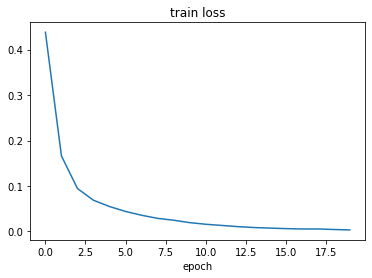

In [158]:
plt.title("train loss")
plt.plot( history.history["loss"] )
plt.xlabel("epoch")

In [159]:
test_loss, test_acc = model.evaluate(X_test,y_test)

330/330 [==============================] - 0s 97us/step


In [160]:
print('test_acc: ',test_acc)
print('test_loss: ',test_loss)

test_acc:  0.9757575988769531
test_loss:  0.07169323981259808
